# [Misplaced Priorities - Part 1](https://xpuzzlecorner.substack.com/p/misplaced-priorities)
## January 5, 2025

## Problem

_Let’s assume for a moment that the first 10 people are in line but they are a completely random order. What’s the probability that everyone is in the correct position except two people (which are definitely in the incorrect position)? What about exactly 3 people in incorrect positions? Exactly 4? Now let’s generalize.  What’s the probability that out of N randomly ordered people, there are exactly k people in an incorrect position?_

## Solution

The bulk of the explination is on the Substack post. Here wil just provide some mathematical proofs.

### Proof that all terms have coefficient 1 or -1

### Proof that $\sum_{i=1}^{n-1} (-1)^i \binom{n}{i}$ equals $-2$ if $n$ is even and $0$ if $n$ is odd

We aim to evaluate the sum:
$$
S_n = \sum_{i=1}^{n-1} (-1)^i \binom{n}{i},
$$
and show that:
$$
S_n = 
\begin{cases} 
-2 & \text{if } n \text{ is even}, \\
0 & \text{if } n \text{ is odd}.
\end{cases}
$$

#### Step 1: Start with the Binomial Theorem
The Binomial Theorem states:
$$
(1 - 1)^n = \sum_{i=0}^n (-1)^i \binom{n}{i}.
$$

For any $n$, this simplifies to:
$$
\sum_{i=0}^n (-1)^i \binom{n}{i} = 0.
$$

#### Step 2: Split the Sum
We split the sum into two parts:
$$
\sum_{i=0}^n (-1)^i \binom{n}{i} = \binom{n}{0} + \sum_{i=1}^n (-1)^i \binom{n}{i}.
$$

Here, $\binom{n}{0} = 1$, so:
$$
1 + \sum_{i=1}^n (-1)^i \binom{n}{i} = 0.
$$

This implies:
$$
\sum_{i=1}^n (-1)^i \binom{n}{i} = -1.
$$

#### Step 3: Adjust the Range of the Sum
We are interested in the sum from $i = 1$ to $i = n-1$, not $i = 1$ to $i = n$. To adjust for this, we remove the $i = n$ term:
$$
\sum_{i=1}^{n-1} (-1)^i \binom{n}{i} = \sum_{i=1}^n (-1)^i \binom{n}{i} - (-1)^n \binom{n}{n}.
$$

Since $(-1)^n \binom{n}{n} = (-1)^n \cdot 1 = (-1)^n$, we have:
$$
\sum_{i=1}^{n-1} (-1)^i \binom{n}{i} = -1 - (-1)^n
$$.

#### Step 4: Simplify
Now, simplify based on the parity of $n$:

1. If $n$ is **even**, then $(-1)^n = 1$:
   $$
   \sum_{i=1}^{n-1} (-1)^i \binom{n}{i} = -1 - 1 = -2.
   $$

2. If $n$ is **odd**, then $(-1)^n = -1$:
   $$
   \sum_{i=1}^{n-1} (-1)^i \binom{n}{i} = -1 - (-1) = 0.
   $$

#### Final Result
Thus, the sum evaluates to:
$$
\sum_{i=1}^{n-1} (-1)^i \binom{n}{i} = 
\begin{cases} 
-2 & \text{if } n \text{ is even}, \\
0 & \text{if } n \text{ is odd}.
\end{cases}
$$

To ensure that we are always removing the right number of permutations, We need to need to re-add $ |\text{\# permutations wtih n fixed points}| $ to the formula for terms $n$ even and remove it for terms $n$ odd.

### Algebra to simplify the inclusion-exclusion formula

$$
S - \binom{n}{1} \frac{n!}{(n-1)!} + \binom{n}{2} \frac{n!}{(n-2)!} - \binom{n}{3} \frac{n!}{(n-3)!} + \ldots + (-1)^n \binom{n}{n} \frac{n!}{(n-n)!} = \sum_{i=0}^{n} (-1)^i \binom{n}{i} \frac{n!}{(n-i)!}
$$

### Simplifying the Expression to the Derangement Formula

We aim to simplify the expression:
$$
\sum_{i=0}^{n} (-1)^i \binom{n}{i} \frac{n!}{(n-i)!}.
$$

This expression can be interpreted as counting permutations with restrictions, which will lead to the **derangement formula**.

#### Step 2: Factorial Simplification
The factorial term $\frac{n!}{(n-i)!}$ simplifies to:
$$
\frac{n!}{(n-i)!} = n \cdot (n-1) \cdot (n-2) \cdots (n-i+1),
$$
which represents the number of ways to permute $i$ specific elements out of $n$.

Thus, each term in the sum is:
$$
(-1)^i \binom{n}{i} \frac{n!}{(n-i)!}.
$$

#### Step 3: Combine the Binomial Coefficient and Factorial Term
By the definition of the binomial coefficient, $\binom{n}{i} = \frac{n!}{i!(n-i)!}$. Substituting this into the expression, the $i$-th term becomes:
$$
(-1)^i \binom{n}{i} \frac{n!}{(n-i)!} = (-1)^i \frac{n!}{i!(n-i)!} \cdot \frac{n!}{(n-i)!}.
$$

Simplify:
$$
(-1)^i \frac{n!}{i!(n-i)!} \cdot \frac{n!}{(n-i)!} = (-1)^i \frac{n!}{i!}.
$$

Thus, the sum becomes:
$$
D_n = \sum_{i=0}^n \frac{(-1)^i n!}{i!}.
$$

#### Step 4: Recognize the Derangement Formula
Factor $n!$ out of the sum:
$$
D_n = n! \sum_{i=0}^n \frac{(-1)^i}{i!}.
$$

The remaining summation is the standard series for the **derangement formula**, which counts the number of permutations of $n$ elements with no fixed points (denoted $D_n$).

#### Final Result
The number of derangements is given by:
$$
D_n = n! \sum_{i=0}^n \frac{(-1)^i}{i!}.
$$

## Answer

$$
\binom{10}{k} \cdot \sum_{i=0}^{10} \frac{(-1)^i}{i!}
$$

In [10]:
import math

def D(k):
    # Compute $D_k = n! \sum_{i=0}^n \frac{(-1)^i}{i!}$
    return math.factorial(k) * sum((-1)**i / math.factorial(i) for i in range(k + 1))

# Compute $\frac{\binom{10}{k}}{10!} \cdot D_k$
def answer(k, n=10):
    return math.comb(n, k) / math.factorial(n) * D(k)

# Compute for $k = 0, 1, \ldots, 10$
print([answer(k) for k in range(11)])
# Print the sum of the above values
print(sum(answer(k) for k in range(11)))

[2.755731922398589e-07, 0.0, 1.240079365079365e-05, 6.613756613756614e-05, 0.0005208333333333333, 0.0030555555555555557, 0.015335648148148149, 0.06130952380952382, 0.18394097222222222, 0.36787918871252206, 0.3678794642857143]
1.0


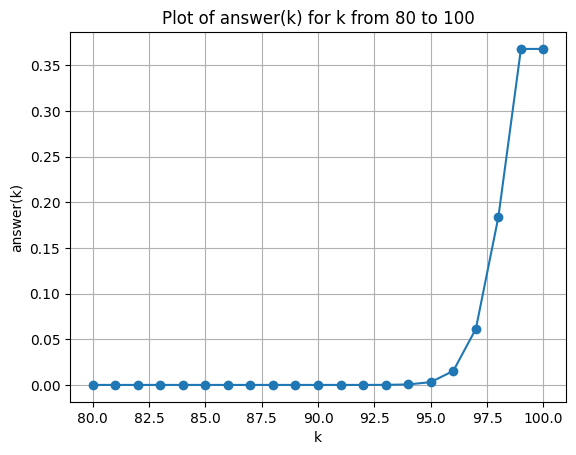

In [9]:
import matplotlib.pyplot as plt

# Limit the range to 80-100
k_values_limited = k_values[79:100]
answer_values_limited = answer_values[79:100]

# Plot the values
plt.plot(k_values_limited, answer_values_limited, marker='o')
plt.xlabel('k')
plt.ylabel('answer(k)')
plt.title('Plot of answer(k) for k from 80 to 100')
plt.grid(True)
plt.show()
